# 1 Scrape/load data

In [4]:
# Load Data
import create_record
import pandas as pd

corpus = create_record.collect_data(1,108,1)
corpus["Text"] = " ".join([i for i in [i.get_text() for i in corpus["SoupContent"]]])

madhahib_df = pd.read_csv("./data/madhahib.csv", sep="\t", index_col=0)
tafasir_df = pd.read_csv("./data/tafasir.csv", sep="\t", index_col=0)


In [ ]:
##########################################################
# offline workaround
import pandas as pd
t1s114a2 = pd.read_csv('C:/Users/anaconda/Desktop/altafsir_scraper/corpus/1_1_7.csv', sep=",", index_col=0).T
t1s114a2

t1s114a1 = {}
t1s114a1["Text"] = t1s114a2["Text"][0]
###########################################################

____
# 2 Preprocessing
## 2.1 Normalizing data

In [6]:
from camel_tools.utils.normalize import normalize_unicode
from camel_tools.utils.normalize import normalize_alef_maksura_ar
from camel_tools.utils.normalize import normalize_alef_ar
from camel_tools.utils.normalize import normalize_teh_marbuta_ar
from camel_tools.utils.dediac import dediac_ar


# def remove_citations(text):
#     import re
#     text_without_citations = re.sub("([\[\{]).*?([\]\}])", "", text)
    
#     return text_without_citations

def reduce_to_archarset(text):
    import re
    # Remove non-arabic characters
    nonarab_chars = '[^\u0621-\u064A ]'
    text = re.sub(nonarab_chars, '', text)
    return text

## normalize
def normalizer(string):
    string = normalize_unicode(string)
    string_normalized = normalize_alef_ar(string)
    string_normalized = normalize_alef_maksura_ar(string_normalized)
    string_normalized = normalize_teh_marbuta_ar(string_normalized)
    
    # remove diacritica
    string_normalized = dediac_ar(string_normalized)
    
    #reduce to arabic charset
    string_normalized = reduce_to_archarset(string_normalized)
    return string_normalized

corpus["TextNormalized"] = normalizer(corpus["Text"])

In [7]:
corpus["TextNormalized"]

'يقول تعالي ذكره  انا اعطيناك  يا محمد  الكوثر  واختلف اهل التاويل في معني الكوثر فقال بعضهم هو نهر في الجنه اعطاه الله نبيه محمدا صلي الله عليه وسلم حدثني يعقوب قال ثنا هشيم قال اخبرنا عطاء بن السائب عن محارب بن دثار عن ابن عمر انه قال الكوثر نهر في الجنه حافتاه من ذهب وفضه يجري علي الدر والياقوت ماؤه اشد بياضا من اللبن واحلي من العسل حدثنا ابن حميد قال ثنا جرير عن عطاء عن محارب بن دثار الباهلي عن ابن عمر في قوله  انا اعطيناك الكوثر  قال نهر في الجنه حافتاه الذهب ومجراه علي الدر والياقوت وماؤه اشد بياضا من الثلج واشد حلاوه من العسل وتربته اطيب من ريح المسك حدثنا ابو كريب قال ثنا عمر بن عبيد عن عطاء عن سعيد بن جبير عن ابن عباس قال الكوثر نهر في الجنه حافتاه من ذهب وفضه يجري علي الياقوت والدر ماؤه ابيض من الثلج واحلي من العسل حدثنا ابن حميد قال ثنا يعقوب القمي عن حفص بن حميد عن شمر بن عطيه عن شقيق او مسروق قال قلت لعائشه يا ام المؤمنين وما بطنان الجنه قالت وسط الجنه حافتاه قصور اللؤلؤ والياقوت ترابه المسك وحصباؤه اللؤلؤ والياقوت حدثنا احمد بن ابي سريج الرازي قال ثنا ابو النضر وشبابه قال

## 2.2 Tokenization

### 2.2.1 Simple Tokenization
Will tokenize words by splitting the string on whitespace and punctuation.

In [8]:
from camel_tools.tokenizers.word import simple_word_tokenize

corpus["Tokenized"] = simple_word_tokenize(corpus["TextNormalized"])

### 2.2.2 Morphological tokenization
The morphological tokenizer expects pre-tokenized text in a list. Therefore run simple_word_tokenize(string) first

In [9]:
from camel_tools.disambig.mle import MLEDisambiguator
from camel_tools.tokenizers.morphological import MorphologicalTokenizer


# Load a pretrained disambiguator to use with a tokenizer
mle = MLEDisambiguator.pretrained('calima-msa-r13')

# `split=True`: morphological tokens are output as seperate strings.
tokenizer = MorphologicalTokenizer(mle, scheme='d3tok', split=True)
corpus["TokenizedMorph"] = tokenizer.tokenize(corpus["Tokenized"])

# Rausfiltern unselbständiger Morpheme
corpus["TokenizedMorph"] = [token for token in corpus["TokenizedMorph"] if not '+' in token]

In [10]:
corpus["TokenizedMorph"]

['يقول',
 'تعالى',
 'ذكر',
 'أنا',
 'أعطينا',
 'يا',
 'محمد',
 'كوثر',
 'أختلف',
 'أهل',
 'تأويل',
 'في',
 'معنى',
 'كوثر',
 'قال',
 'عض',
 'هو',
 'نهر',
 'في',
 'جنة',
 'أعطى',
 'الله',
 'نبيه',
 'محمدا',
 'صلى',
 'الله',
 'على',
 'سلم',
 'حدث',
 'يعقوب',
 'قال',
 'ثنا',
 'هشيم',
 'قال',
 'أخبر',
 'عطاء',
 'بن',
 'سائب',
 'عن',
 'محارب',
 'بن',
 'دثار',
 'عن',
 'ابن',
 'عمر',
 'أن',
 'قال',
 'كوثر',
 'نهر',
 'في',
 'جنة',
 'حافتا',
 'من',
 'ذهب',
 'فضة',
 'يجري',
 'على',
 'در',
 'ياقوت',
 'ماء',
 'أشد',
 'بياضا',
 'من',
 'لبن',
 'أحلى',
 'من',
 'عسل',
 'حدث',
 'ابن',
 'حميد',
 'قال',
 'ثنا',
 'جرير',
 'عن',
 'عطاء',
 'عن',
 'محارب',
 'بن',
 'دثار',
 'الباهلي',
 'عن',
 'ابن',
 'عمر',
 'في',
 'قول',
 'أنا',
 'أعطينا',
 'كوثر',
 'قال',
 'نهر',
 'في',
 'جنة',
 'حافتا',
 'ذهب',
 'مجرى',
 'على',
 'در',
 'ياقوت',
 'ماء',
 'أشد',
 'بياضا',
 'من',
 'ثلج',
 'أشد',
 'حلاوة',
 'من',
 'عسل',
 'تربة',
 'أطيب',
 'من',
 'ريح',
 'ألمس',
 'حدث',
 'أبو',
 'ريب',
 'قال',
 'ثنا',
 'عمر',
 'بن',
 'عبيد',
 

## [2.3 Remove stopwords from token list]
normalization needs to implemented for stoplist, before usable

In [19]:
def stopwords(token_list, stopwords_list, morph=True):

    token_list_filtered = []
    words_removed = []
    with open (stopwords_list, encoding="UTF-8") as stopwords:
        if morph == True:
            x = stopwords.read()
        else:
            x = normalizer(stopwords.read())
        for token in token_list:
            if token not in x:
                token_list_filtered.append(token)
            if token in x:
                words_removed.append(token)

    return token_list_filtered, words_removed

In [20]:
corpus["TokenizedMorphStopword"] = stopwords(corpus["TokenizedMorph"], 'C:/Users/anaconda/Desktop/arabic-stop-words-master/list2.txt')[0]
corpus["TokenizedStopword"] = stopwords(corpus["Tokenized"], 'C:/Users/anaconda/Desktop/arabic-stop-words-master/list2.txt', morph=False)[0]


----
# 3 Analyzing data
## 3.1 Morphological analysis of tokens

In [11]:
import pandas as pd
from camel_tools.morphology.database import MorphologyDB
from camel_tools.morphology.analyzer import Analyzer


# set up morphological analyzer
db = MorphologyDB.builtin_db("calima-msa-r13")
analyzer = Analyzer(db)

# create dictionary for every token taking index value in corpus["tokenized"] as key
corpus_token_analysis = {}
for i, val in enumerate(corpus["Tokenized"]):
    corpus_token_analysis[i] = pd.DataFrame(analyzer.analyze(corpus["Tokenized"][i]))


In [15]:
corpus_token_analysis[34]

,diac,lex,bw,gloss,pos,prc3,prc2,prc1,prc0,per,...,root,bwtok,pattern,lex_logprob,atbtok,atbseg,d1seg,stem,stemgloss,stemcat
0,أَخْبَرْنا,أَخْبَر,أَخْبَر/PV+نا/PVSUFF_SUBJ:1P,notify;communicate+we_<verb>,verb,0,0,0,0,1,...,خ.ب.ر,أَخْبَر_+نا,أَ1ْ2َ3ْنا,-5.099521,أَخْبَرْنا,أَخْبَرْنا,أَخْبَرْنا,أَخْبَر,notify;communicate,PV
1,أَخْبَرَنا,أَخْبَر,أَخْبَر/PV+َ/PVSUFF_SUBJ:3MS+نا/PVSUFF_DO:1P,notify;communicate+he;it_<verb>_us,verb,0,0,0,0,3,...,خ.ب.ر,أَخْبَر_+َ_+نا,أَ1ْ2َ3َنا,-5.099521,أَخْبَرَ_+نا,أَخْبَرَ_+نا,أَخْبَرَنا,أَخْبَر,notify;communicate,PV


## 3.2 Frequency analysis

In [98]:
# create with root as key and frequency count as val
freqs = {}
def frequency_analyzer(token_list):
    token_freqs = {}
    for token in token_list:
        if token in token_freqs:
            token_freqs[token] += 1
        else:
            token_freqs[token] = 1

    # sorting
    token_freqs = {k: v for k, v in sorted(token_freqs.items(), key=lambda item: item[1], reverse=True)}
    return token_freqs

### 3.2.1 ... of morphologically tokenized tokens

In [99]:
freqs["TokenizedMorphStopword"]= frequency_analyzer(corpus["TokenizedMorphStopword"])

### 3.2.2 ... of roots

In [100]:
# create list of roots for the lemma with max probability for a given token from tokens_analysis
corpus["RootsList"] = []
for i in range(1, len(corpus["Tokenized"])):
    if "lex_logprob" in corpus_token_analysis[i]:
        corpus["RootsList"].append(corpus_token_analysis[i][corpus_token_analysis[i].lex_logprob == corpus_token_analysis[i].lex_logprob.max()].iloc[0]["root"])


In [101]:
freqs["RootsList"] = frequency_analyzer(corpus["RootsList"])

---
# --- Transliteration --- #

In [60]:
from camel_tools.utils.charmap import CharMapper
from camel_tools.utils.transliterate import Transliterator



# Instantiate the builtin bw2ar (Buckwalter to Arabic) CharMapper
ar2bw = CharMapper.builtin_mapper('ar2bw')

# Instantiate Transliterator with the bw2ar CharMapper with '@@IGNORE@@' marker (default)
ar2bw_translit = Transliterator(ar2bw)

# Generate Arabic transliteration from BW




corpus["RootsListTransliterated"] = []
for i in corpus["RootsList"]:
    corpus["RootsListTransliterated"].append(ar2bw_translit.transliterate(i))


corpus["TokenizedMorphTransliterated"] = []
for i in corpus["TokenizedMorph"]:
    corpus["TokenizedMorphTransliterated"].append(ar2bw_translit.transliterate(i))

-----

## 3.3 Named-entity recognition
Hint: it seems that simple tokenization is more apt for NER, as it doesn't remove enclitics like "ك" from parts of the name

In [25]:
from camel_tools.tokenizers.word import simple_word_tokenize
from camel_tools.ner import NERecognizer

ner = NERecognizer.pretrained()

# NERecognizer expects pre-tokenized text
sentence = t1s114a1["Tokenized"] # simple_word_tokenize(t1s114a1["Text"])

labels = ner.predict_sentence(sentence)

# save each token paired with it's NER label
zipped = list(zip(sentence, labels))


In [29]:
# Filter and glue named entities into dictionary
named_entities = {"LOC" : [], "ORG" : [], "PERS" : [], "MISC" : []}
for i, val in enumerate(zipped):
    if zipped[i][1][0] == "B":
        named_entities[zipped[i][1][2:]].append(zipped[i][0])
    if zipped[i][1][0] == "I":
        named_entities[zipped[i][1][2:]][-1] = named_entities[zipped[i][1][2:]][-1] + " " + zipped[i][0]
named_entities["MISC"]

['الله',
 'الله',
 'الكوثر',
 'الكوثر',
 'الياقوت',
 'اللؤلؤ',
 'الكوثر',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الكوثر',
 'الله',
 'الله',
 'الكوثر',
 'الله',
 'الله',
 'الله',
 'الكوثر',
 'الله',
 'الله',
 'الكوثر',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الياقوت',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'اللؤلؤ',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الكوثر',
 'الله',
 'الله',
 'الله',
 'الله',
 'الكوثر',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الياقوت',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الله',
 'الكوثر',
 'الله',
 'الله',
 'الله',
 'الله',
 'الفجر',
 'الله',
 'الله',
 'الله',
 'لله',
 'بالله',
 'الله',
 'الله',
 'الحديبيه',
 'الله',
 'البيت',
 'الله',
 'الله',
 'الله',
 'ربك',
 'الله',
 'الله',
 'الكوثر',
 'الابتر',
 'ال

# 4 Visualization

## 4.1 Barplot of Root frequencies

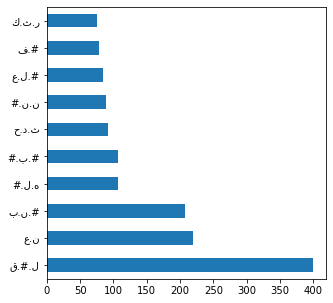

In [105]:
freq = pd.Series(frequency_analyzer(corpus["RootsList"]))[:20]

import matplotlib.pyplot as plt

freq.plot(kind="barh", figsize=(5, 5))
plt.show()

## 4.2 Wordcloud of most frequent words

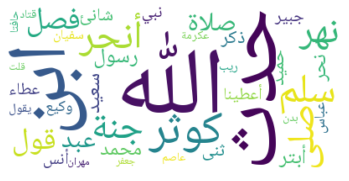

In [115]:
from collections import Counter

from wordcloud import WordCloud          # pip install wordcloud
import matplotlib.pyplot as plt          
# -- Arabic text dependencies
from arabic_reshaper import reshape      # pip install arabic-reshaper
from bidi.algorithm import get_display   # pip install python-bidi

rtl = lambda w: get_display(reshape(f'{w}'))

COUNTS = Counter(corpus["TokenizedMorphStopword"])
counts = {rtl(k):v for k, v in COUNTS.most_common(40)}



font_file = './NotoNaskhArabic-Regular.ttf'
wordcloud = WordCloud(font_path=font_file, background_color="white").generate_from_frequencies(counts)
wordcloud.to_file("arabic_example.png")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
